Frame shape: (1209, 1314, 3)


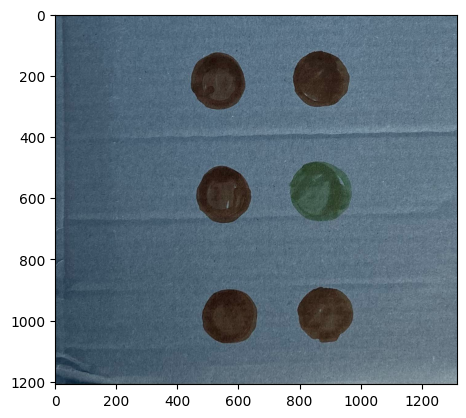

In [8]:
import cv2
import numpy as np
from ipywidgets import *
import matplotlib.pyplot as plt
webcam = False
if webcam == True:
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    frame = np.array(frame)
else:
    frame = cv2.imread("src/controller/IMG_2338_2.jpg")


print("Frame shape: " + str(frame.shape))
plt.imshow(frame)
img_hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
img_hsv_blur = cv2.medianBlur(img_hsv,15)
img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
def f (hMin ,hMax ,Smin,Smax ,Vmin,Vmax):
    #img1 = img
    #img = cv2.cvtColor(img1 ,cv2.COLOR_BGR2RGB)  #in matplot image show in rgb format in cv2 it show in bgr format remeber this else you will face problem
    #hsv = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2HSV)# if you are going to use cv2 to show image then cv2.COLOR_BGR2HSV 
    hsv = img_hsv_blur
    Lhsv = np.array([hMin,Smin,Vmin])
    Uhsv = np.array([hMax ,Smax,Vmax])
    mask = cv2.inRange(hsv,Lhsv ,Uhsv)
    r = cv2.bitwise_and(img_rgb,img_rgb,mask =mask)
    
    
    plt.imshow(r)
  
    
interactive_plot = interactive(f,hMin=(0,179),hMax = (0,179),Smin = (0,250),Smax =(0,255),Vmin=(0,255),Vmax=(0,255))

In [9]:
interactive_plot

interactive(children=(IntSlider(value=89, description='hMin', max=179), IntSlider(value=89, description='hMax'…

In [7]:
# close cap 
cap.release()